In [ ]:
!pip install "yfinance"
!pip install "yahoofinancials"

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=67798d48e4608d18cdf7196b9f1a049113729ba7421544d4cb21bb6e460fdb61
  Stored in directory: /root/.cache/pip/wheels/4

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
from datetime import timedelta, date

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/CONVICTIONLISTTOPN_BSLD-408.csv',header=None)
df.rename(columns={1: "time", 2: "number",3 : "code", 4 : "type", 5: "mer", 6 : "value"},inplace=True)
df


,0,time,number,code,type,mer,value
0,10:01:54.481 77425 [77425-thread-2] INFO a.s....,2004-02-11,SU,SU,Energy Minerals,GN63J3-R,0.953727
1,10:01:54.481 77425 [77425-thread-2] INFO a.s....,2004-02-11,GGG,GGG,Producer Manufacturing,H5490W-R,0.952753
2,10:01:54.481 77425 [77425-thread-2] INFO a.s....,2004-02-11,WGR,WGR,Energy Minerals,V0622Q-R,0.947634
3,10:01:54.481 77425 [77425-thread-2] INFO a.s....,2004-02-11,CWT,CWT,Utilities,GSWXLY-R,0.934181
4,10:01:54.481 77425 [77425-thread-2] INFO a.s....,2004-02-11,BLL,BLL,Process Industries,VFT0VQ-R,0.922862
...,...,...,...,...,...,...,...
37355,10:27:03.049 77425 [77425-thread-2] INFO a.s....,2022-02-09,PEP,PEP,Consumer Non-Durables,PPCTFP-R,0.701507
37356,10:27:03.049 77425 [77425-thread-2] INFO a.s....,2022-02-09,SSNC,SSNC,Technology Services,G92RX2-R,0.701123
37357,10:27:03.049 77425 [77425-thread-2] INFO a.s....,2022-02-09,GEF,GEF,Process Industries,MPX0N4-R,0.697954
37358,10:27:03.049 77425 [77425-thread-2] INFO a.s....,2022-02-09,DPZ,DPZ,Consumer Services,F05QG0-R,0.697741


In [ ]:
df.describe()

,value
count,37360.000000
mean,0.731634
std,0.118071
min,0.413554
25%,0.655228
50%,0.743032
75%,0.813181
max,0.987225


In [ ]:
df = df[df['mer'].notnull()]
df = df.dropna()
df.isnull().sum()

0         0
time      0
number    0
code      0
type      0
mer       0
value     0
dtype: int64

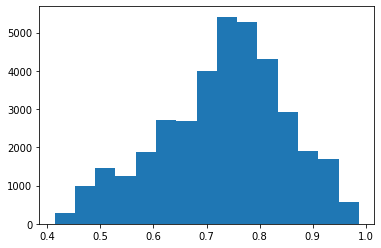

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.hist(df["value"],bins = 15)
plt.show()
plt.clf()

In [ ]:
def tydzien(x):
    rok = x[0:2]
    x = x[2:]
    date = datetime.strptime(x, "%y-%m-%d")
    EndDate = date - timedelta(days=6)
    data_koncowa = EndDate.strftime("%y-%m-%d")
    return(rok + data_koncowa)

def dzien(x):
    rok = x[0:2]
    x = x[2:]
    date = datetime.strptime(x, "%y-%m-%d")
    EndDate = date + timedelta(days=1)
    data_koncowa = EndDate.strftime("%y-%m-%d")
    return(rok + data_koncowa)

In [ ]:
def ob_zwrot(x, y):
  lista = []
  dane = yf.download(x, 
                      start=tydzien(y), 
                      end=dzien(y), 
                      progress=False)
  for index, row in dane.iterrows():
    lista.append(row["Close"])
  if len(lista) > 0:
    zwrot = (lista[-1]/lista[0])-1
  else:
    zwrot ="nic"
  return(zwrot)

In [ ]:
sl_score = {}

for lab, row in df.iterrows():
    sl_score[row["time"]] = {}
    if "." in row["code"]:
      znak_z_x = row["code"]
      indeks_znaku = znak_z_x.index(".")
      row["code"] = znak_z_x[0:indeks_znaku]

    sl_score[row["time"]][row["code"]] = row["value"]


In [ ]:
sl_zwrot = {}

for lab, row in df.iterrows():
    sl_zwrot[row["time"]] = {}
    if "." in row["code"]:
      znak_z_x = row["code"]
      indeks_znaku = znak_z_x.index(".")
      row["code"] = znak_z_x[0:indeks_znaku]

    sl_zwrot[row["time"]][row["code"]] = ob_zwrot(row["code"],row["time"])

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
1 Failed download:
- BXG: No data found, symbol may be delisted

1 Failed download:
- LM: No data found, symbol may be delisted

1 Failed download:
- SIAL: No data found for this date range, symbol may be delisted

1 Failed download:
- GGP: No data found for this date range, symbol may be delisted

1 Failed download:
- PSUNQ: No data found for this date range, symbol may be delisted

1 Failed download:
- CTX: No data found for this date range, symbol may be delisted

1 Failed download:
- CHG: No data found for this date range, symbol may be delisted

1 Failed download:
- RCRC: No data found for this date range, symbol may be delisted

1 Failed download:
- BDG: Data doesn't exist for startDate = 1080777600, endDate = 1081382400

1 Failed download:
- LC: Data doesn't exist for startDate = 1080777600, endDate = 1081382400

1 Failed download:
- BGGSQ: No data found, symbol may be delisted

1 Failed download:
- GAS: Data doesn

KeyboardInterrupt: ignored

In [ ]:

date_time = datetime.fromtimestamp(1156377600)
print(date_time)

2006-08-24 00:00:00
